In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
df.describe()
# df.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:
y = df[['Outcome']]
x = df.loc[:,df.columns!='Outcome']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("\n",type(x_train),"\n",type(y_train),"\n",type(x_test),"\n",type(y_test),"\n")
print("\n",x_train.shape,"\n",y_train.shape,"\n",x_test.shape,"\n",y_test.shape,"\n")



 <class 'pandas.core.frame.DataFrame'> 
 <class 'pandas.core.frame.DataFrame'> 
 <class 'pandas.core.frame.DataFrame'> 
 <class 'pandas.core.frame.DataFrame'> 


 (614, 8) 
 (614, 1) 
 (154, 8) 
 (154, 1) 



In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000).fit(x_train,y_train)
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


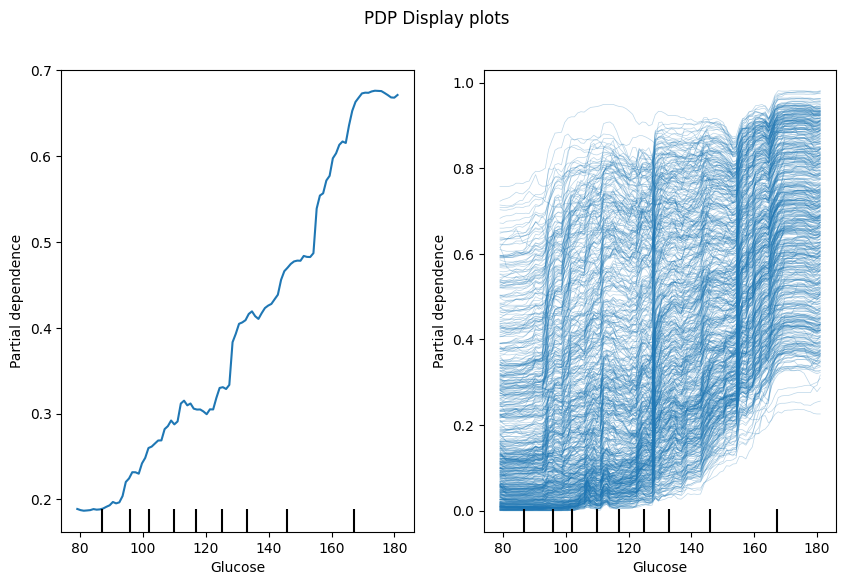

In [97]:
# PDP and ICE

from sklearn.inspection import PartialDependenceDisplay
x_features = list(x_train.columns)
fig, ax = plt.subplots(1,2,figsize=(10,6))
PartialDependenceDisplay.from_estimator(model,x_train,features=['Glucose'],feature_names=x_features, ax=ax[0])
PartialDependenceDisplay.from_estimator(model,x_train,features=['Glucose'],feature_names=x_features, ax=ax[1], kind='individual')
# PartialDependenceDisplay.from_estimator(model,x_test,features=['Glucose'],feature_names=x_features, ax=ax[1])
fig.suptitle("PDP Display plots")
plt.show()

In [94]:
print(x_train.loc[1])
print(df.loc[1])

Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Name: 1, dtype: float64
Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64


In [107]:
# pip install lime
import lime.lime_tabular as ll
explainer = ll.LimeTabularExplainer(training_data = x_train.to_numpy(), training_labels=y_train, feature_names=x_features)
explainer.explain_instance(x_train.loc[2].to_numpy(),model.predict_proba).show_in_notebook()

KeyError: 2

In [106]:
# pip install shap
import shap
explainer = shap.TreeExplainer(model)
# explainer.expected_value
shap.initjs()
shap.force_plot(explainer.expected_value[1],explainer.shap_values(x_test[0].to_numpy())[1],x_test[0])

KeyError: 0